In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


parental_level_of_education,math_score,reading_score,writing_score,mean_score
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
some high school,78,76,68,74.00000
high school,73,75,76,74.66667
some high school,59,67,61,62.33333
⋮,⋮,⋮,⋮,⋮
high school,73,88,83,81.33333
some college,70,70,73,71.00000
some high school,61,72,74,69.00000


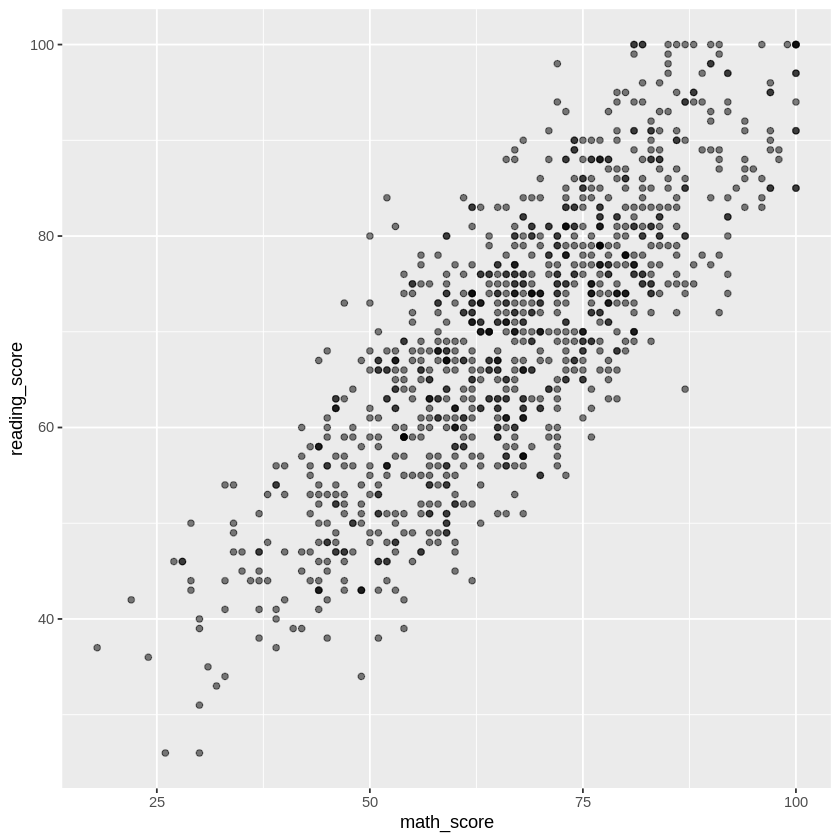

In [2]:
url <- "http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000"
exam_data <- read_csv(url)
colnames(exam_data) <- c("gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course", 
                         "math_score", "reading_score", "writing_score")
exam_data1<- exam_data |>
mutate(parental_level_of_education = as_factor(parental_level_of_education)) |>
mutate("mean_score" = (math_score + reading_score + writing_score)/3) |>
select(parental_level_of_education, math_score, reading_score, writing_score, mean_score)

exam_data1

exam_graph <- exam_data1 |>
ggplot(aes(x = math_score, y = reading_score)) +
geom_point(alpha = 0.5) +
labs(color = "Parental level of education")

exam_graph

data_split <- initial_split(exam_data1, prop = 0.75, strata = parental_level_of_education)
data_train <- training(data_split)
data_test <- testing(data_split)

data_recipe <- recipe(parental_level_of_education ~ math_score + reading_score + writing_score, data = data_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

In [ ]:
exam_data

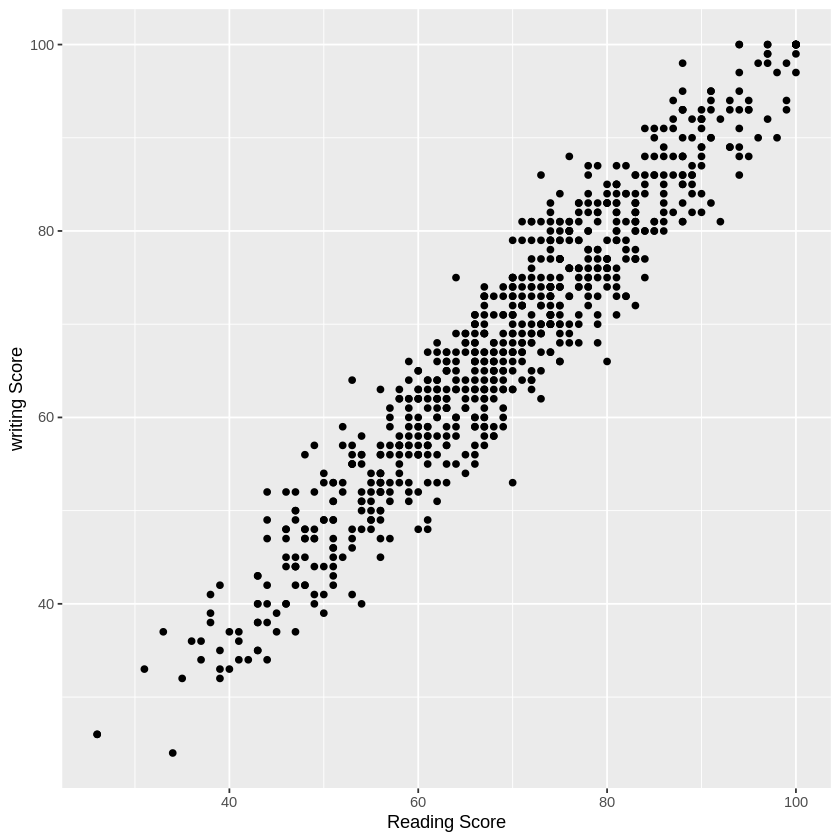

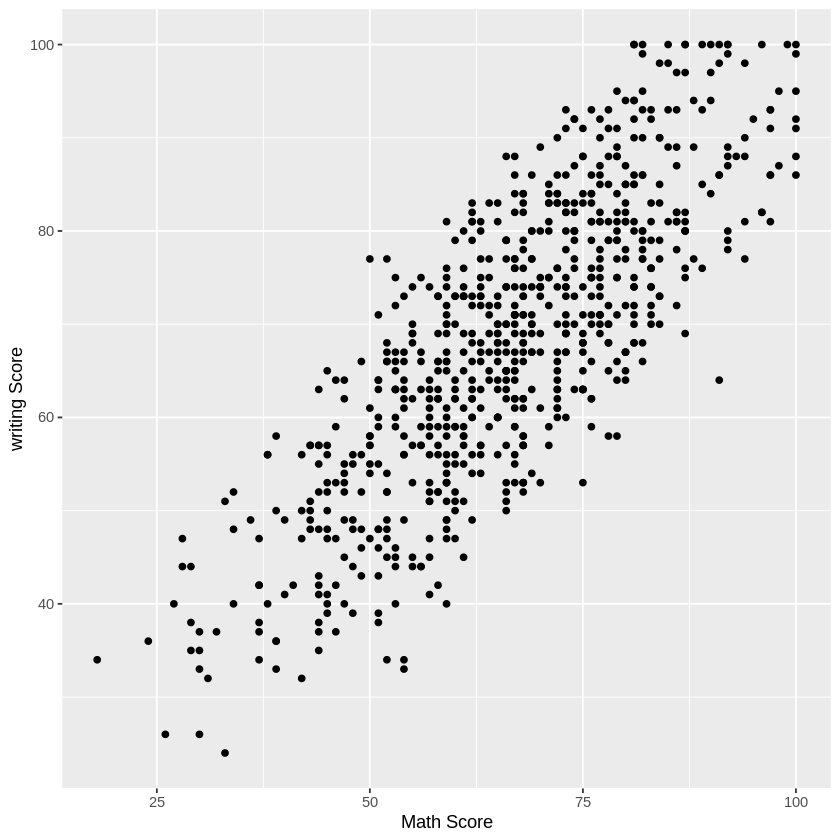

student,math_score,reading_score,writing_score,mean_score
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,78,76,68,74.00000
2,73,75,76,74.66667
3,59,67,61,62.33333
⋮,⋮,⋮,⋮,⋮
998,73,88,83,81.33333
999,70,70,73,71.00000
1000,61,72,74,69.00000


student,math_score,reading_score,writing_score,mean_score
<int>,<dbl>,<dbl>,<dbl>,<dbl>
28,26,26,26,26
30,32,33,37,34
33,56,47,53,52
⋮,⋮,⋮,⋮,⋮
976,84,82,77,81.00000
977,81,82,81,81.33333
998,73,88,83,81.33333


student,math_score,reading_score,writing_score,mean_score
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,73,75,76,74.66667
5,44,54,52,50.00000
13,73,73,69,71.66667
⋮,⋮,⋮,⋮,⋮
992,77,79,78,78
996,60,58,62,60
1000,61,72,74,69


    student        math_score     reading_score    writing_score   
 Min.   :  1.0   Min.   : 18.00   Min.   : 26.00   Min.   : 24.00  
 1st Qu.:252.8   1st Qu.: 56.00   1st Qu.: 59.00   1st Qu.: 57.75  
 Median :504.5   Median : 67.00   Median : 70.00   Median : 69.00  
 Mean   :503.1   Mean   : 66.44   Mean   : 69.48   Mean   : 68.32  
 3rd Qu.:746.2   3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
 Max.   :999.0   Max.   :100.00   Max.   :100.00   Max.   :100.00  
   mean_score   
 Min.   :26.00  
 1st Qu.:58.67  
 Median :68.83  
 Mean   :68.08  
 3rd Qu.:77.75  
 Max.   :99.67  

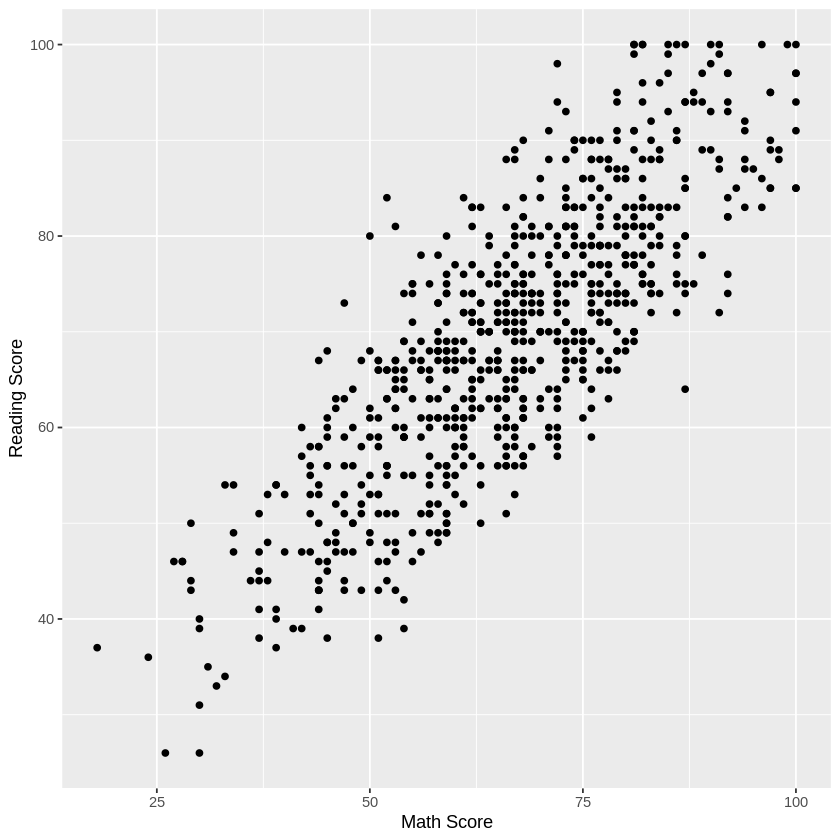

In [3]:
graph1 <- ggplot(data_train, aes(x = reading_score, y = writing_score)) +
geom_point() +
xlab("Reading Score") +
ylab("writing Score")

graph2 <- ggplot(data_train, aes(x = math_score, y = writing_score)) +
geom_point() +
xlab("Math Score") +
ylab("writing Score")

graph3 <- ggplot(data_train, aes(x = math_score, y = reading_score)) +
geom_point() +
xlab("Math Score") +
ylab("Reading Score")

graph1
graph2
graph3

exam_data1<- exam_data |>
mutate("mean_score" = (math_score + reading_score + writing_score)/3) |>
mutate(student = seq(from = 1, to = 1000)) |>
select(student, math_score, reading_score, writing_score, mean_score)

exam_data1

data_split <- initial_split(exam_data1, prop = 0.75, strata = reading_score)
data_train <- training(data_split)
data_test <- testing(data_split)

data_train
data_test
summary(data_train)

In [4]:
data_recipe <- recipe(reading_score ~ writing_score, data = data_train) |>
 step_scale(all_predictors()) |>
 step_center(all_predictors())

data_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

data_vfold <- vfold_cv(data_train, v = 5, strata = reading_score)

data_wkflw <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(data_spec)

data_wkflw

gridvals <- tibble(neighbors = seq(1, 200, by = 3))

data_results <- data_wkflw |>
tune_grid(resamples = data_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse")

data_results

data_multi <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(data_spec) |>
  tune_grid(data_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  filter(mean == min(mean))

data_k <- data_multi |>
              pull(neighbors)

data_multi

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6.775492,5,0.21523333,Preprocessor1_Model01
4,rmse,standard,5.362290,5,0.08308117,Preprocessor1_Model02
7,rmse,standard,4.961065,5,0.13592502,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
193,rmse,standard,6.151698,5,0.1009767,Preprocessor1_Model65
196,rmse,standard,6.190814,5,0.1006578,Preprocessor1_Model66
199,rmse,standard,6.231169,5,0.1058983,Preprocessor1_Model67


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,4.570487,5,0.1339029,Preprocessor1_Model07


In [5]:
data_spec <- nearest_neighbor(weight_func = "rectangular",  neighbors = 25) |>
set_engine("kknn")|>
set_mode("regression")

data_fit <- workflow() |>
add_recipe(data_recipe) |>
add_model(data_spec)|>
fit(data = data_train)

data_summary <- data_fit |>
predict(data_test) |>
bind_cols(data_test) |>
metrics(truth = reading_score, estimate = .pred) |>
filter(.metric == 'rmse')

data_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.712605


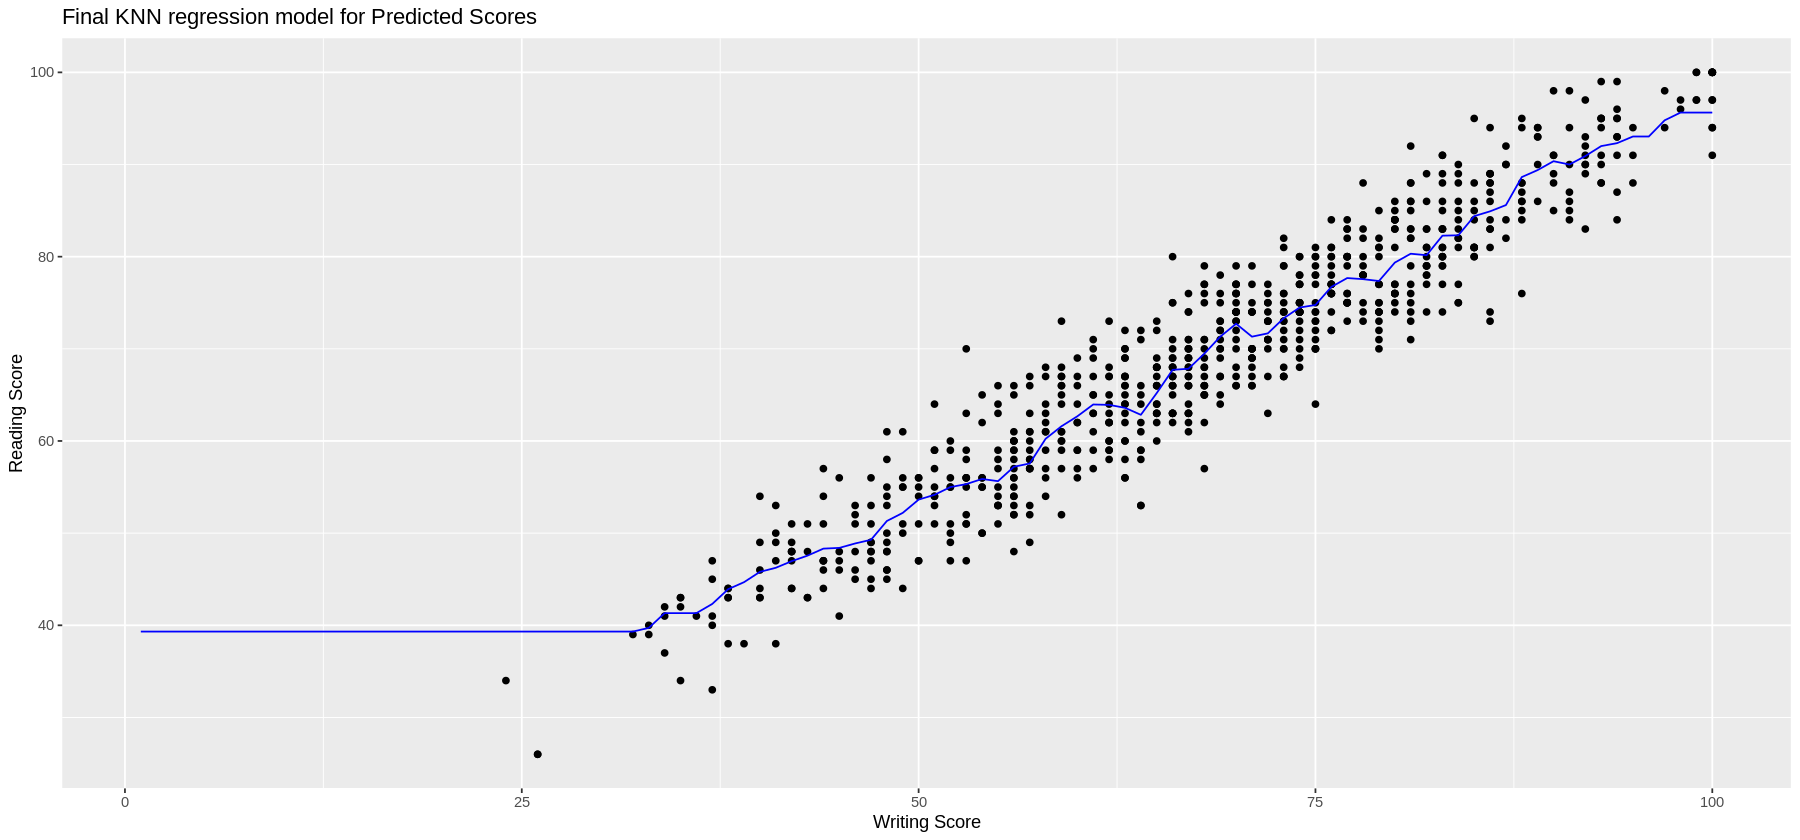

In [18]:
data_preds <- tibble(writing_score = seq(1:100))

data_preds <- data_fit |>
predict(data_preds) |>
bind_cols(data_preds)

knn_plot <- ggplot(data_train, aes(x = writing_score, y = reading_score)) +
geom_point() +
geom_line(data = data_preds,
         mapping = aes(x = writing_score, y = .pred),
         color = "blue") +
ggtitle("Final KNN regression model for Predicted Scores") +
xlab("Writing Score") +
ylab("Reading Score") 

knn_plot

In [7]:
nearest_neighbors <- data_train |>
mutate(diff = abs(100 - writing_score)) |>
arrange(diff) |>
slice(1:5)

nearest_neighbors

student,math_score,reading_score,writing_score,mean_score,diff
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
104,92,97,100,96.33333,0
160,89,97,100,95.33333,0
167,88,100,100,96.00000,0
218,92,94,100,95.33333,0
247,99,100,100,99.66667,0


In [8]:
prediction <- nearest_neighbors |>
summarize(predicted = mean(reading_score))

prediction

predicted
<dbl>
97.6


Linear Regression

In [9]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(writing_score ~ reading_score, data = data_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = data_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
  (Intercept)  reading_score  
       -2.172          1.015  


In [10]:
lm_test_results <- lm_fit |>
  predict(data_test) |>
  bind_cols(data_test) |>
  metrics(truth = writing_score, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.867755
rsq,standard,0.905316
mae,standard,3.937339


`geom_smooth()` using formula 'y ~ x'



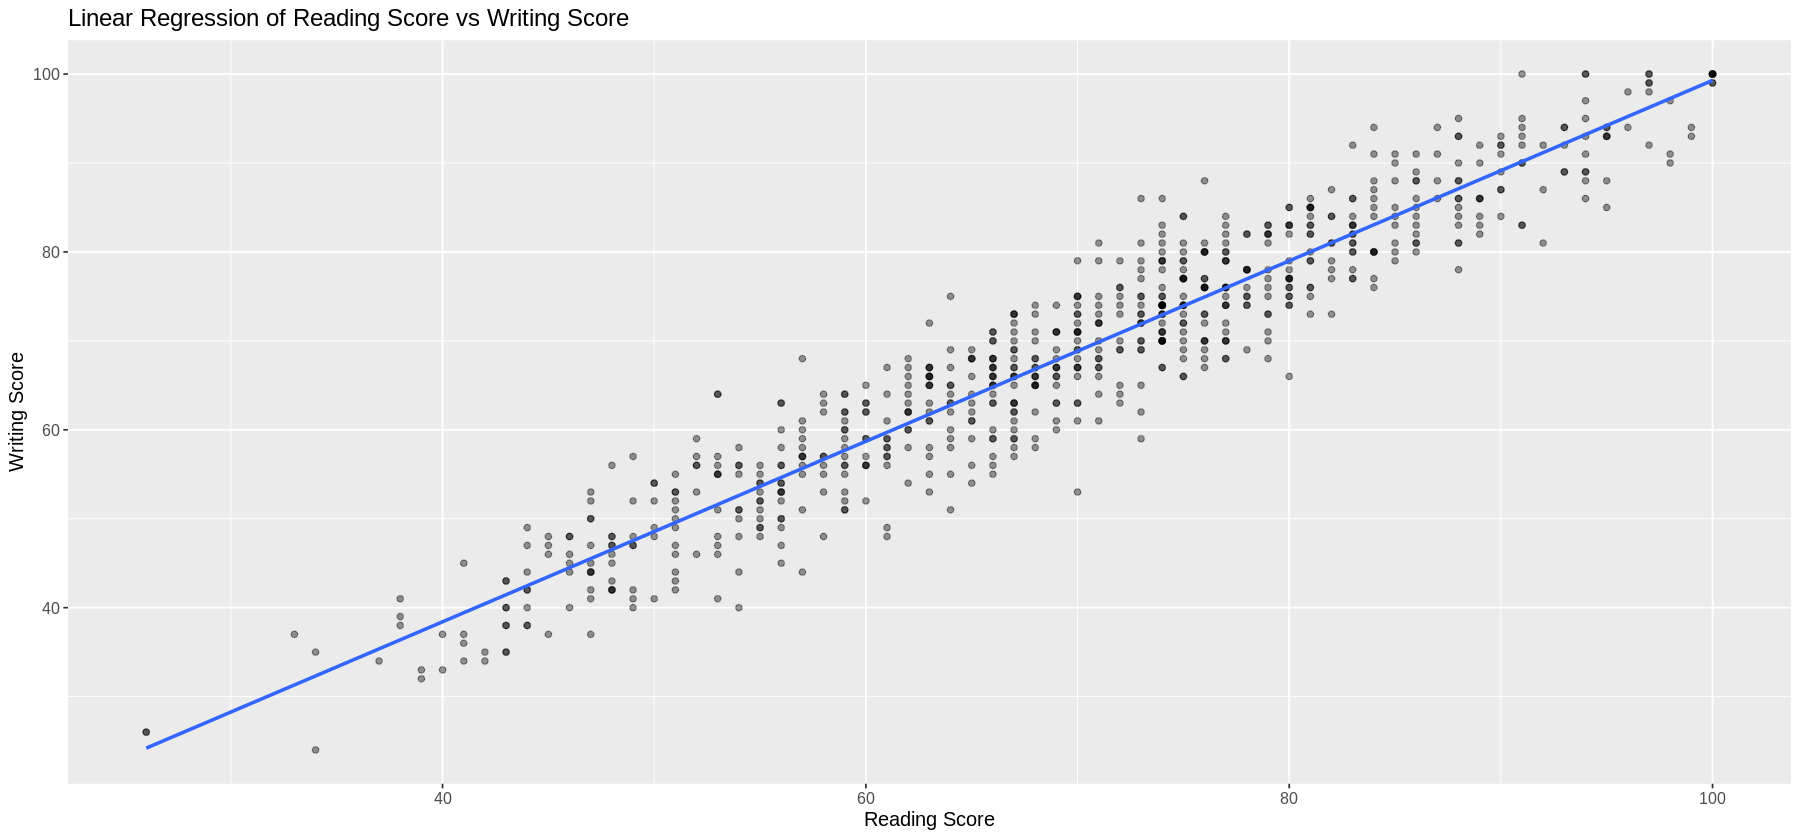

In [20]:
lm_plot_final <- ggplot(data_train, aes(x = reading_score, y = writing_score)) +
  geom_point(alpha = 0.4) +
  xlab("Reading Score") +
  ylab("Writing Score") +
  ggtitle("Linear Regression of Reading Score vs Writing Score")+
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 12))

lm_plot_final

`geom_smooth()` using formula 'y ~ x'



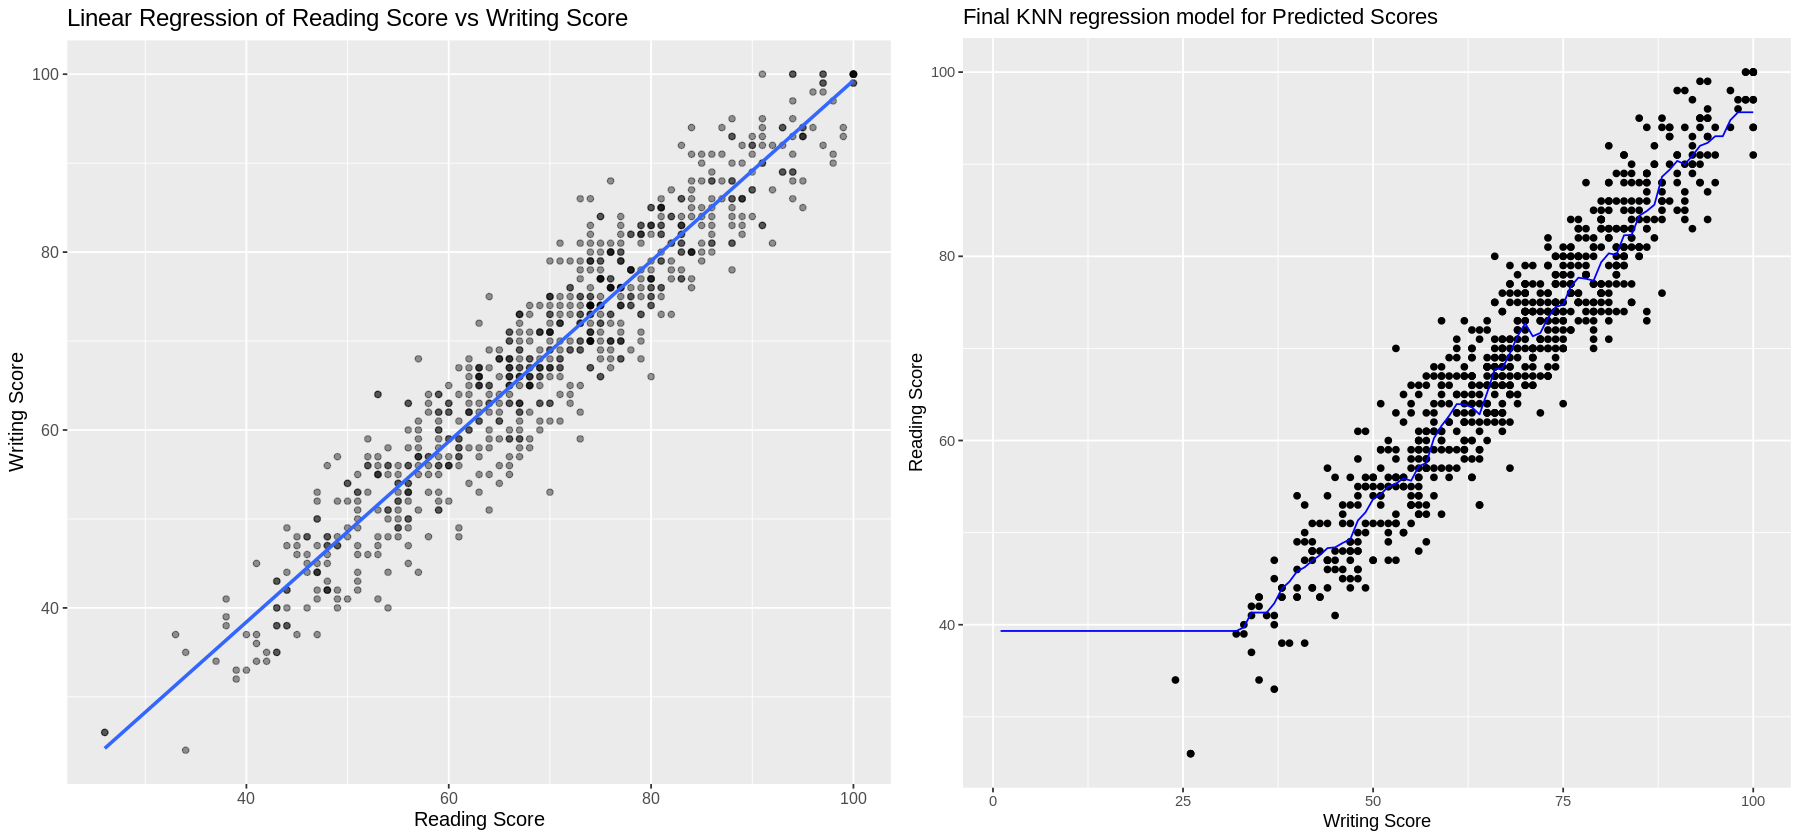

In [21]:
library(cowplot)
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(lm_plot_final, knn_plot, ncol = 2)